# Student Performance Exploratory Data Analysis
This notebook analyzes the student performance dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:

df.shape

(1000, 8)

In [4]:

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:

df.duplicated().sum()

0

In [6]:

# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:

df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [13]:

df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:

reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


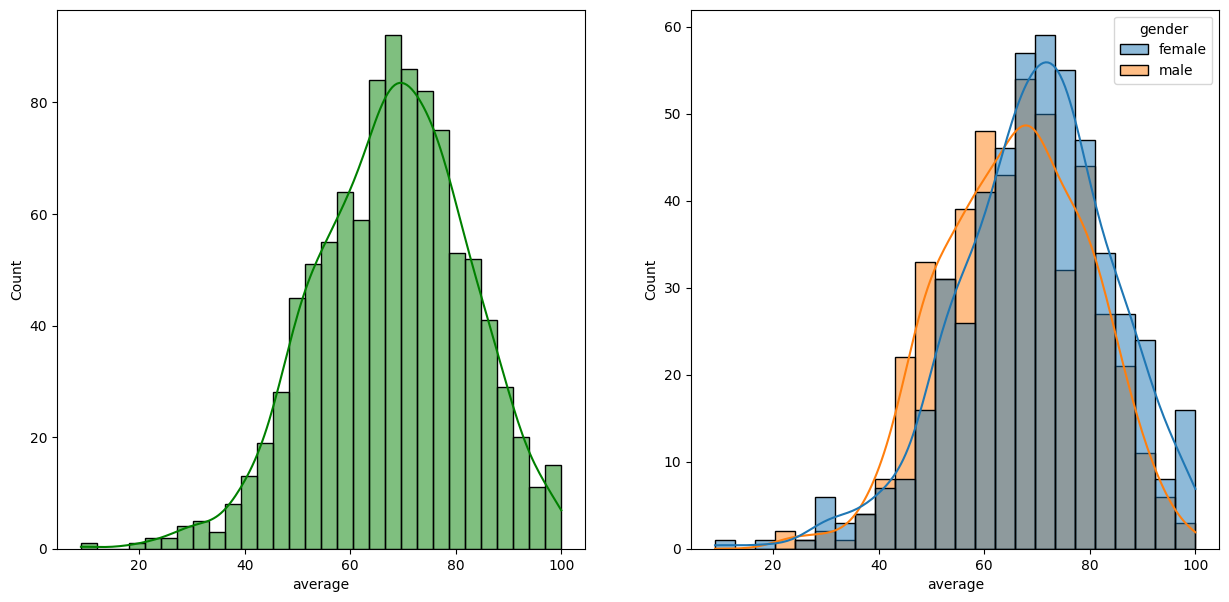

In [16]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

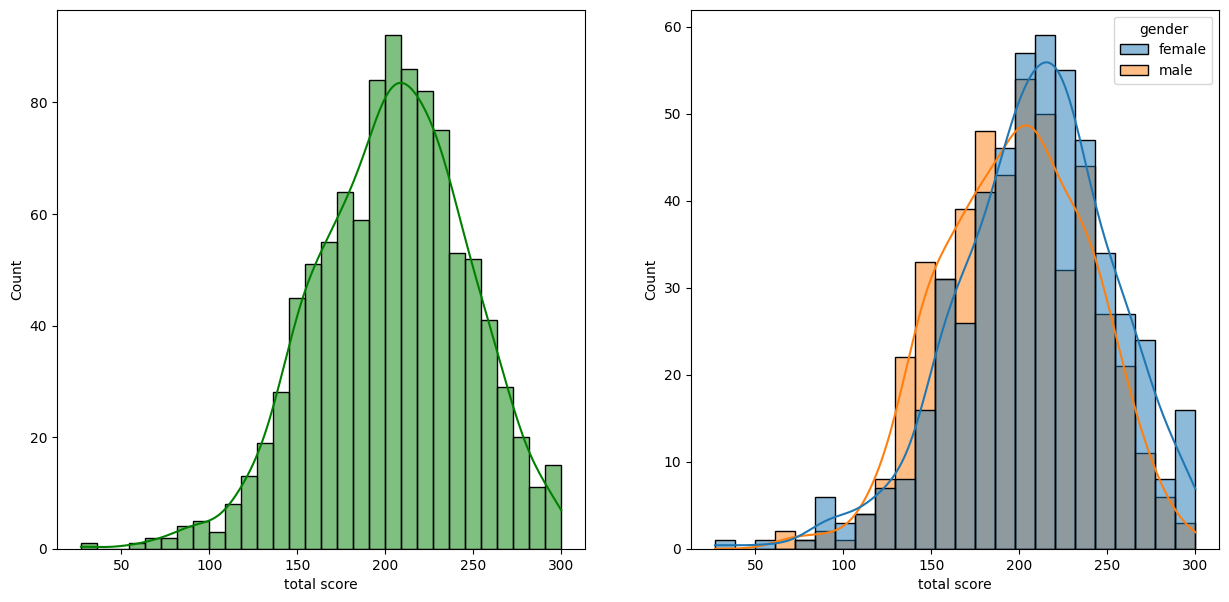

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

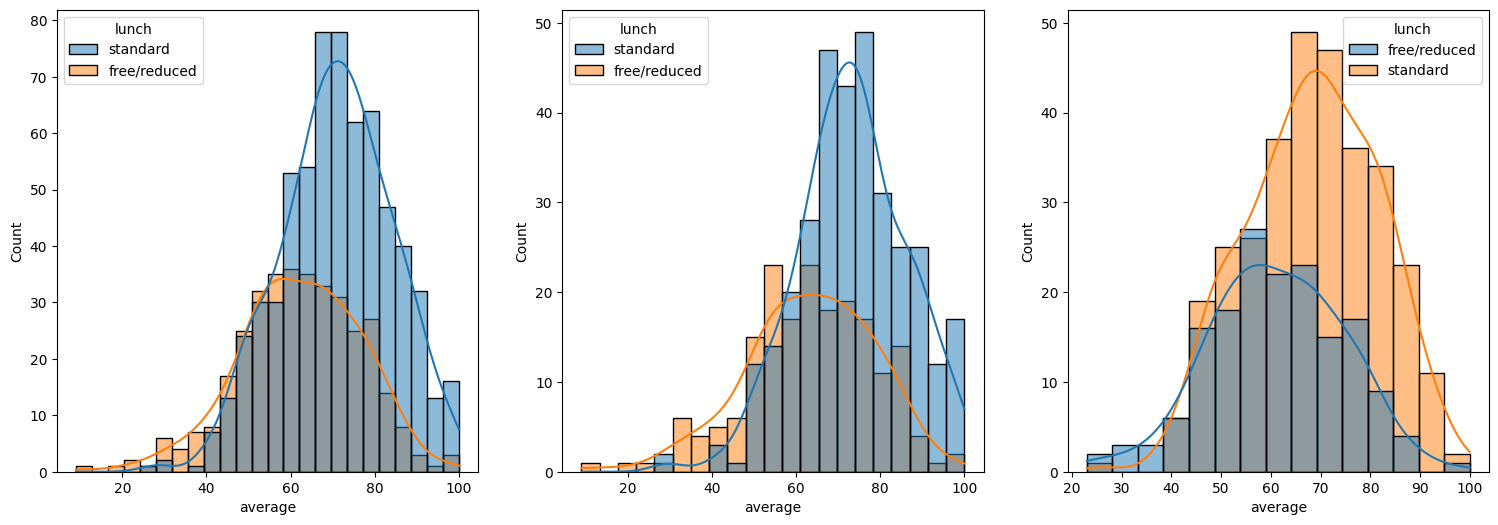

In [18]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

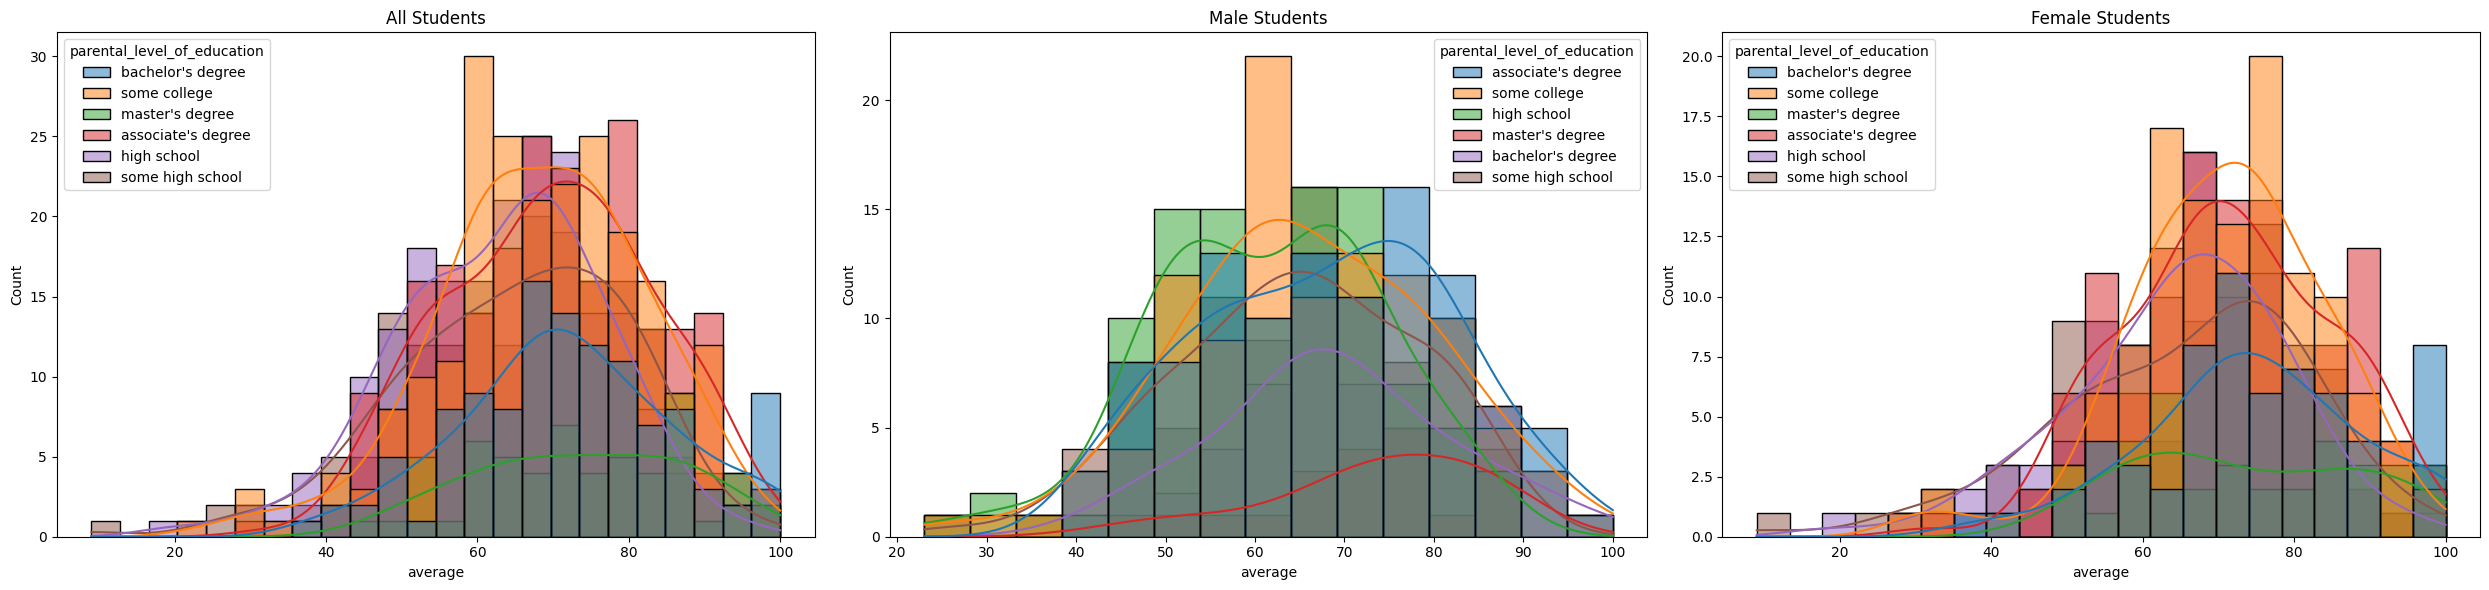

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axes[0])
plt.title('All Students')

plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education', ax=axes[1])
plt.title('Male Students')

plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education', ax=axes[2])
plt.title('Female Students')

plt.tight_layout()
plt.show()

In [20]:
print(df.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')


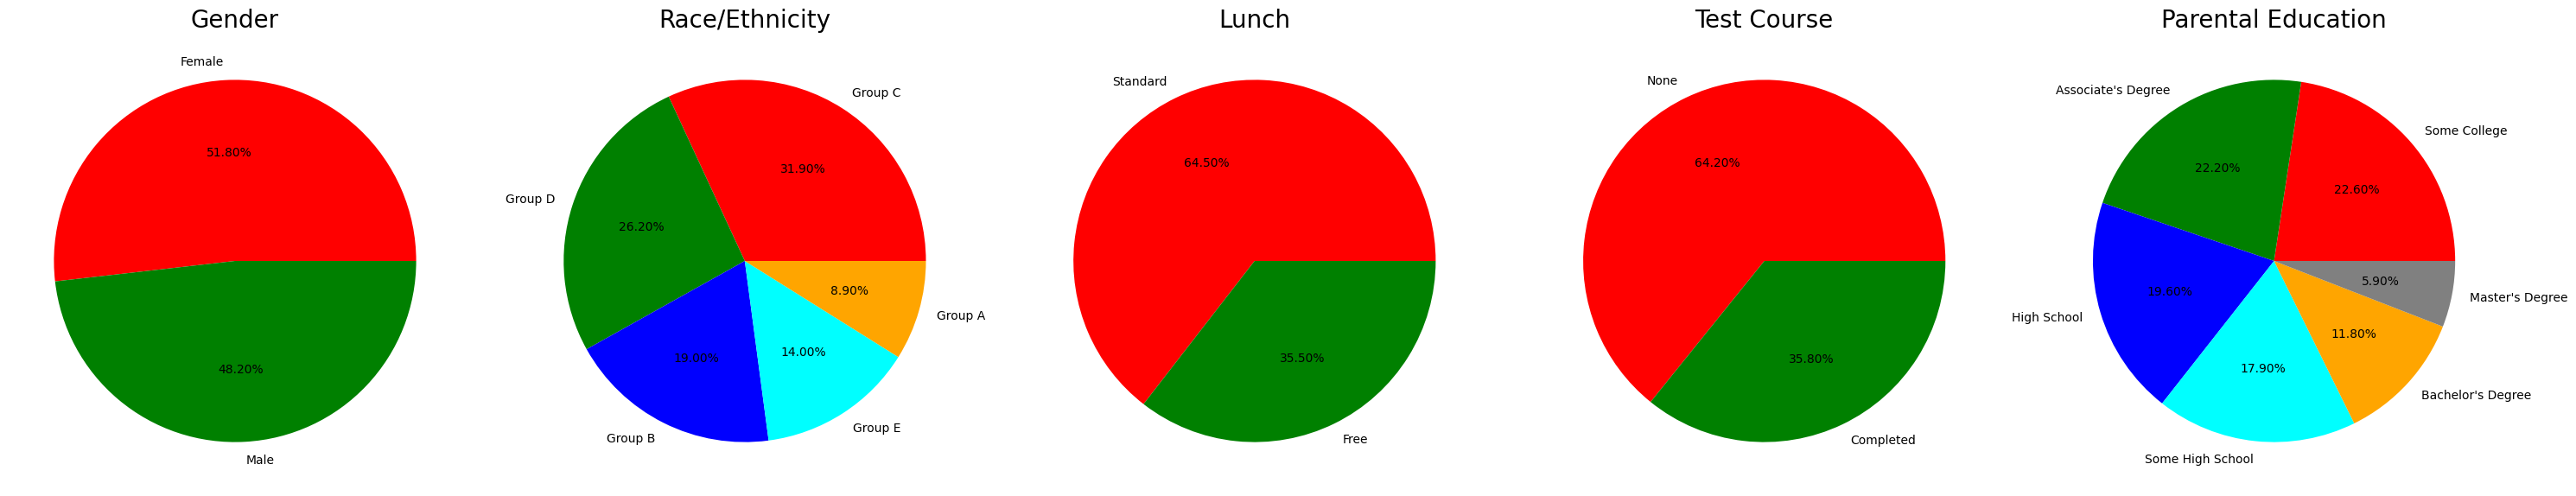

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

# Subplot 1: Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ('Female', 'Male')
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Subplot 2: Race/Ethnicity
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ('Group C', 'Group D', 'Group B', 'Group E', 'Group A')
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Subplot 3: Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ('Standard', 'Free')
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Subplot 4: Test Preparation Course
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = ('None', 'Completed')
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

# Subplot 5: Parental Level of Education
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = ('Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree")
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

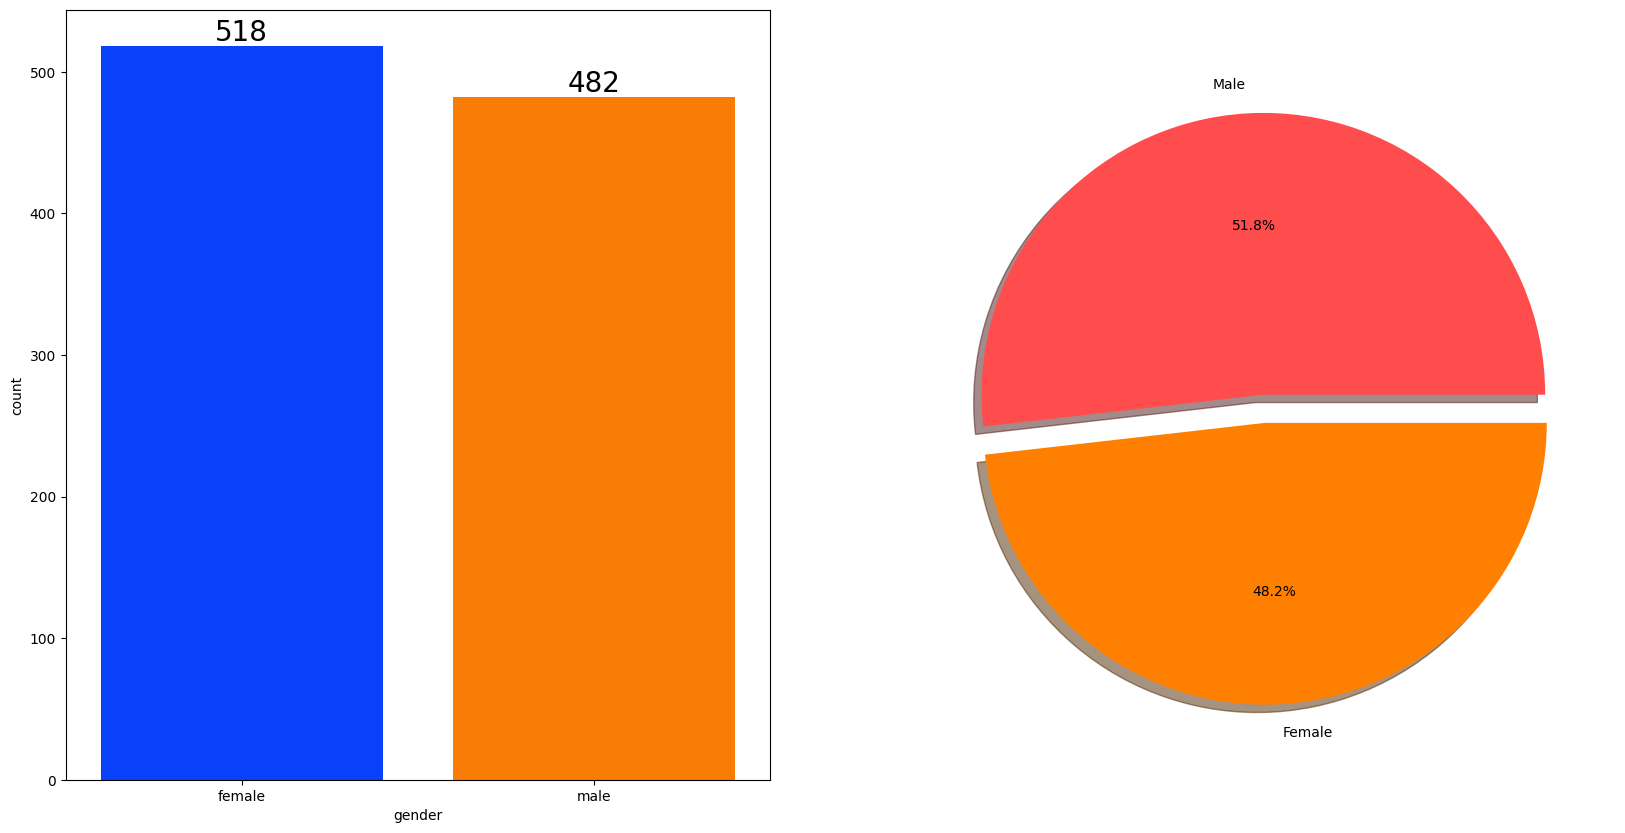

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [23]:
# Method 1: Calculate mean for specific numeric columns
gender_group = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'average']].mean()
print(gender_group)

# Method 2: Use numeric_only=True to automatically select numeric columns
gender_group = df.groupby('gender').mean(numeric_only=True)
print(gender_group)

# Method 3: If you want to see all columns
print(df.groupby('gender').agg({
    'math_score': 'mean',
    'reading_score': 'mean',
    'writing_score': 'mean',
    'average': 'mean'
}))

        math_score  reading_score  writing_score    average
gender                                                     
female   63.633205      72.608108      72.467181  69.569498
male     68.728216      65.473029      63.311203  65.837483
        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483
        math_score  reading_score  writing_score    average
gender                                                     
female   63.633205      72.608108      72.467181  69.569498
male     68.728216      65.473029      63.311203  65.837483


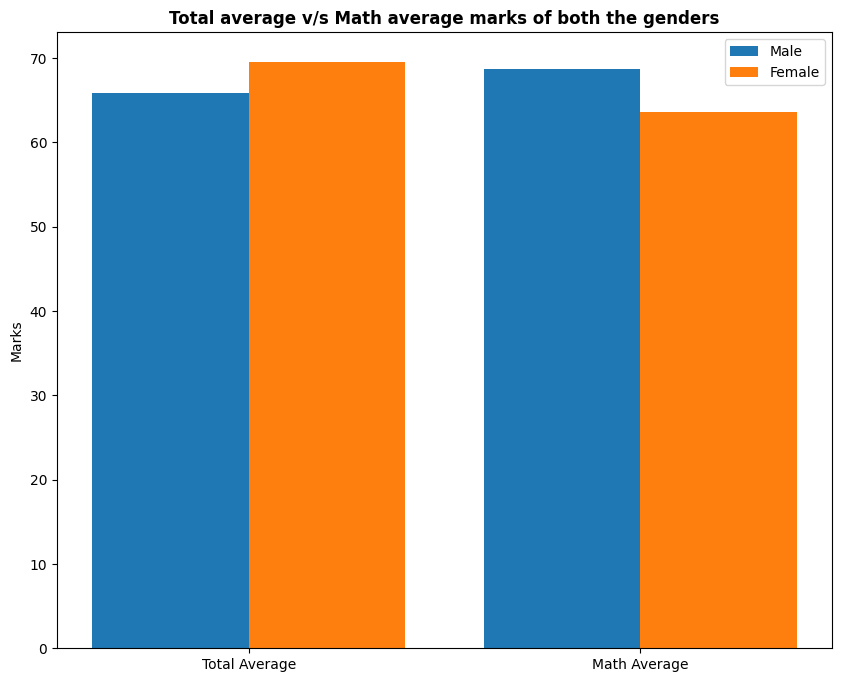

In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

# Extract values using correct column names (with underscores)
female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

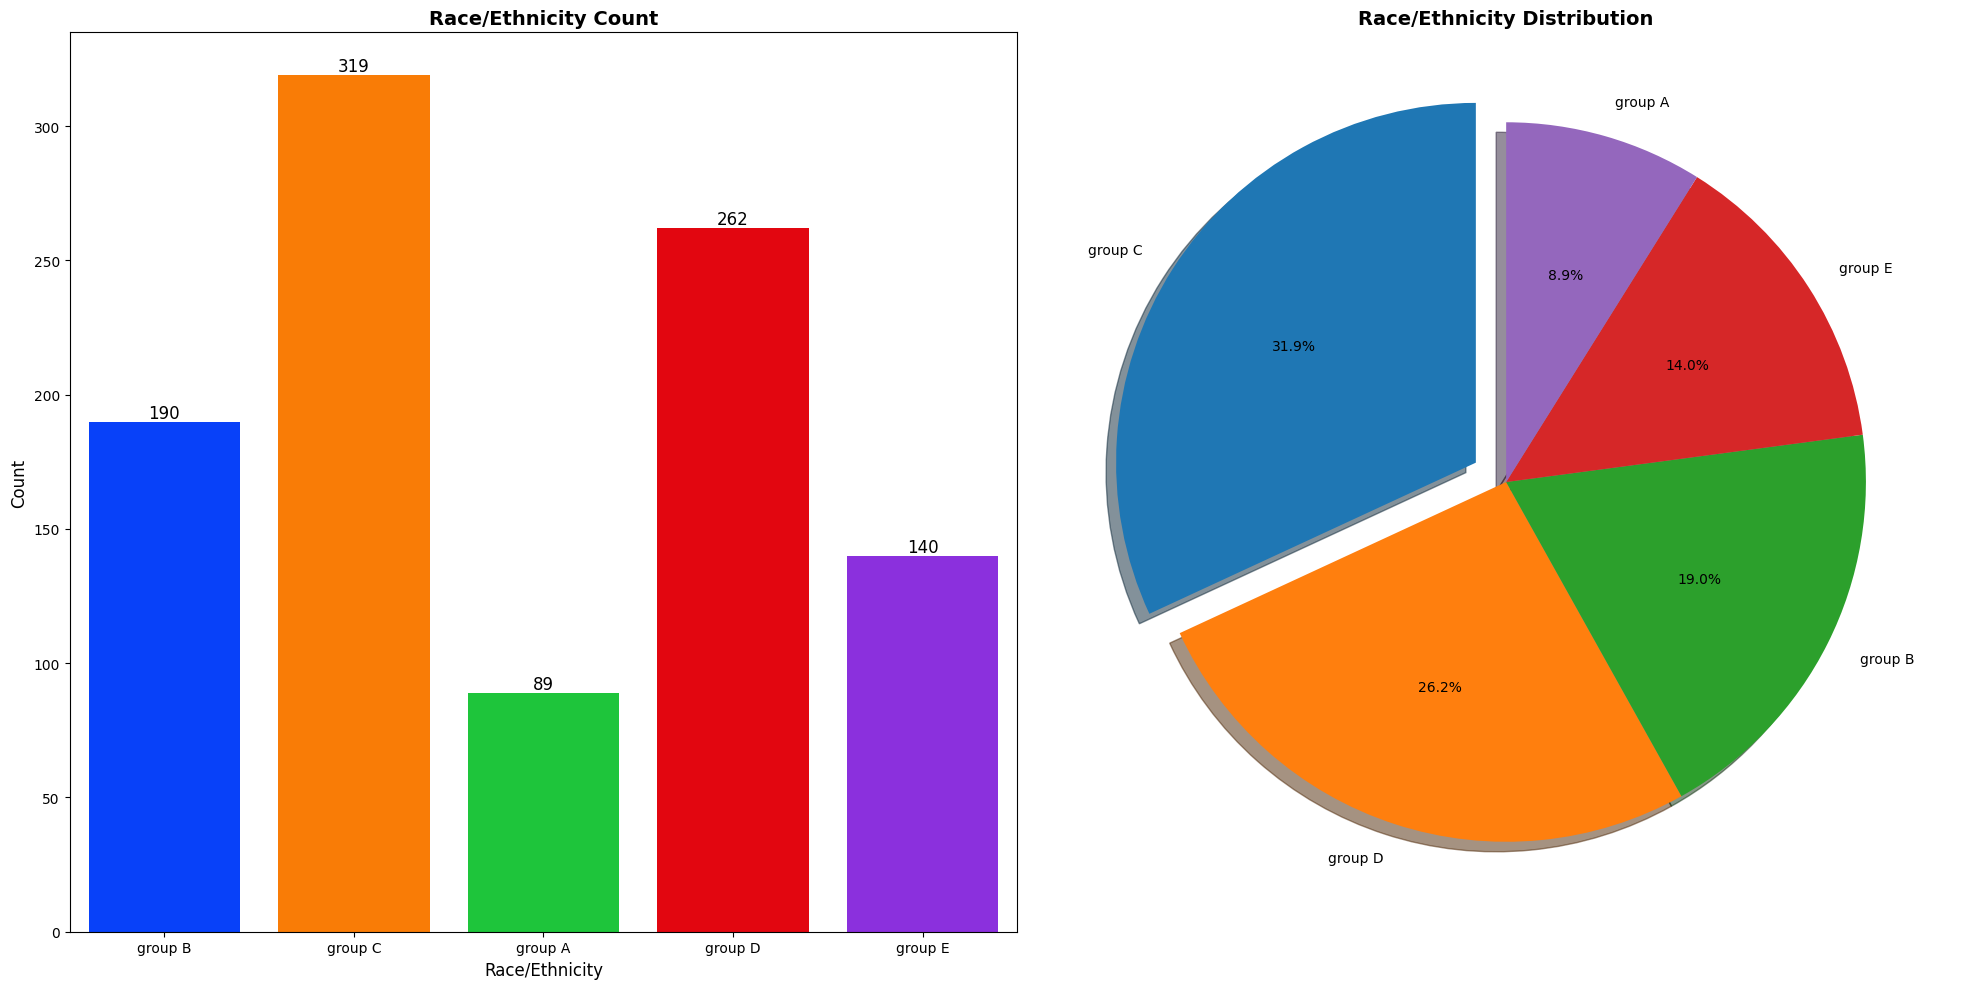

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot on the left
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Race/Ethnicity Count', fontweight='bold', fontsize=14)
ax[0].set_xlabel('Race/Ethnicity', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

# Pie chart on the right
ax[1].pie(x=df['race_ethnicity'].value_counts(), 
          labels=df['race_ethnicity'].value_counts().index,
          explode=[0.1, 0, 0, 0, 0],
          autopct='%1.1f%%',
          shadow=True,
          startangle=90)
ax[1].set_title('Race/Ethnicity Distribution', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

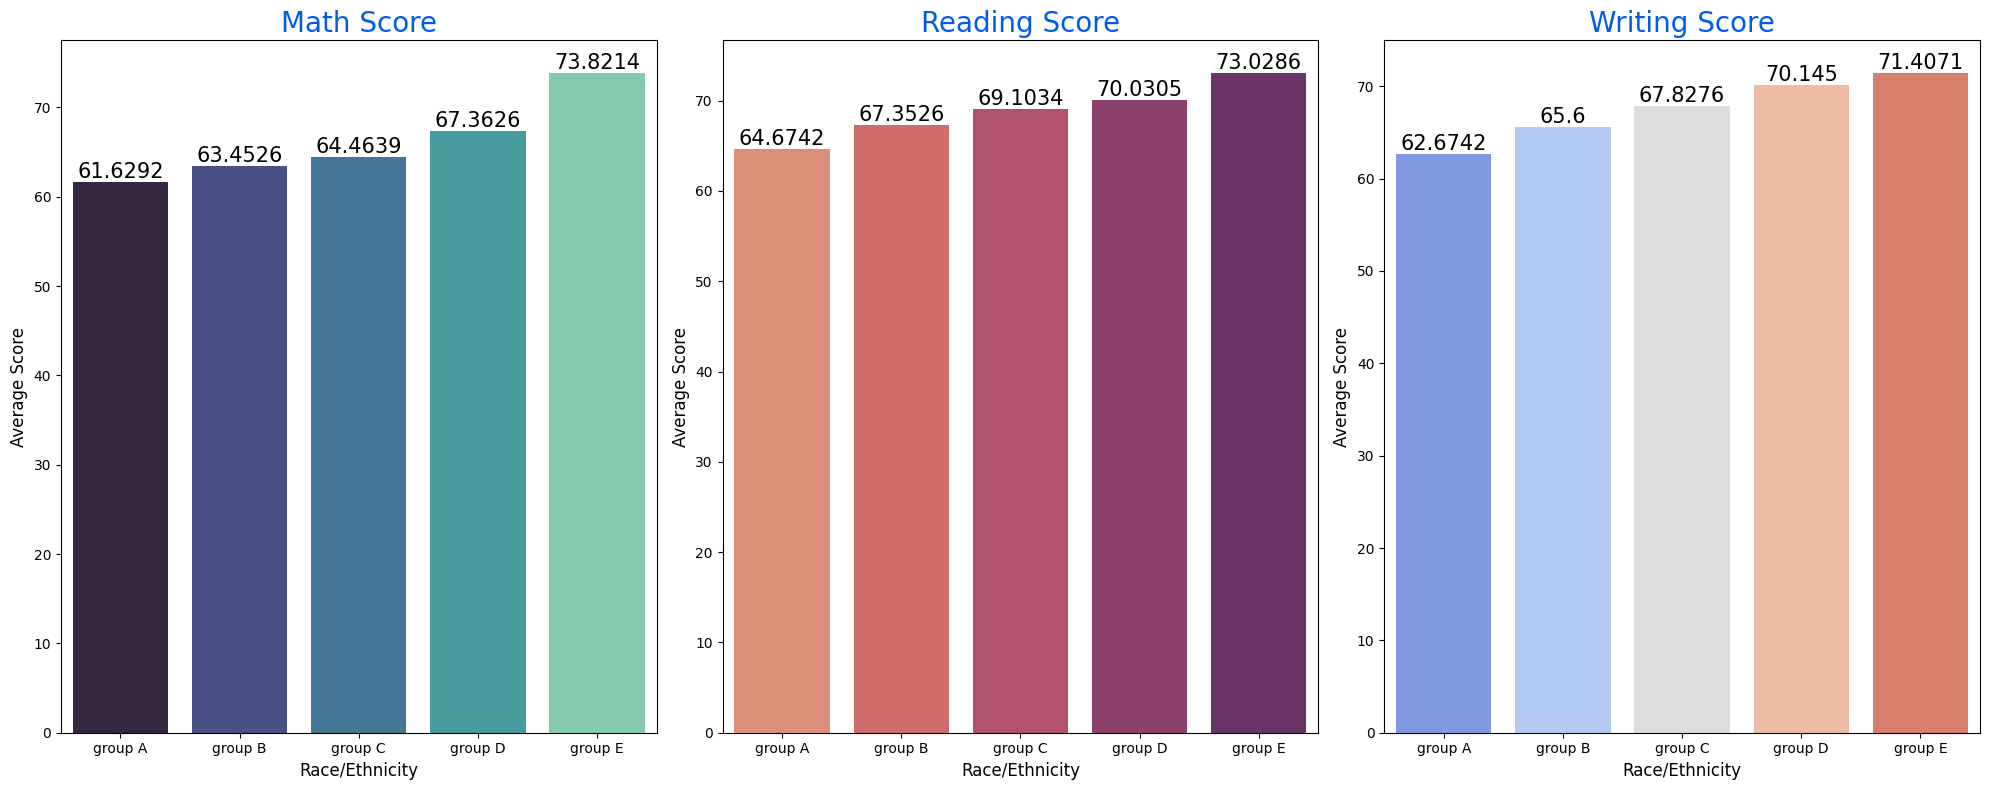

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

Group_data2 = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math Score
sns.barplot(x=Group_data2['math_score'].mean().index, 
            y=Group_data2['math_score'].mean().values, 
            palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].set_ylabel('Average Score', fontsize=12)
ax[0].set_xlabel('Race/Ethnicity', fontsize=12)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading Score
sns.barplot(x=Group_data2['reading_score'].mean().index, 
            y=Group_data2['reading_score'].mean().values, 
            palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
ax[1].set_ylabel('Average Score', fontsize=12)
ax[1].set_xlabel('Race/Ethnicity', fontsize=12)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing Score
sns.barplot(x=Group_data2['writing_score'].mean().index, 
            y=Group_data2['writing_score'].mean().values, 
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
ax[2].set_ylabel('Average Score', fontsize=12)
ax[2].set_xlabel('Race/Ethnicity', fontsize=12)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

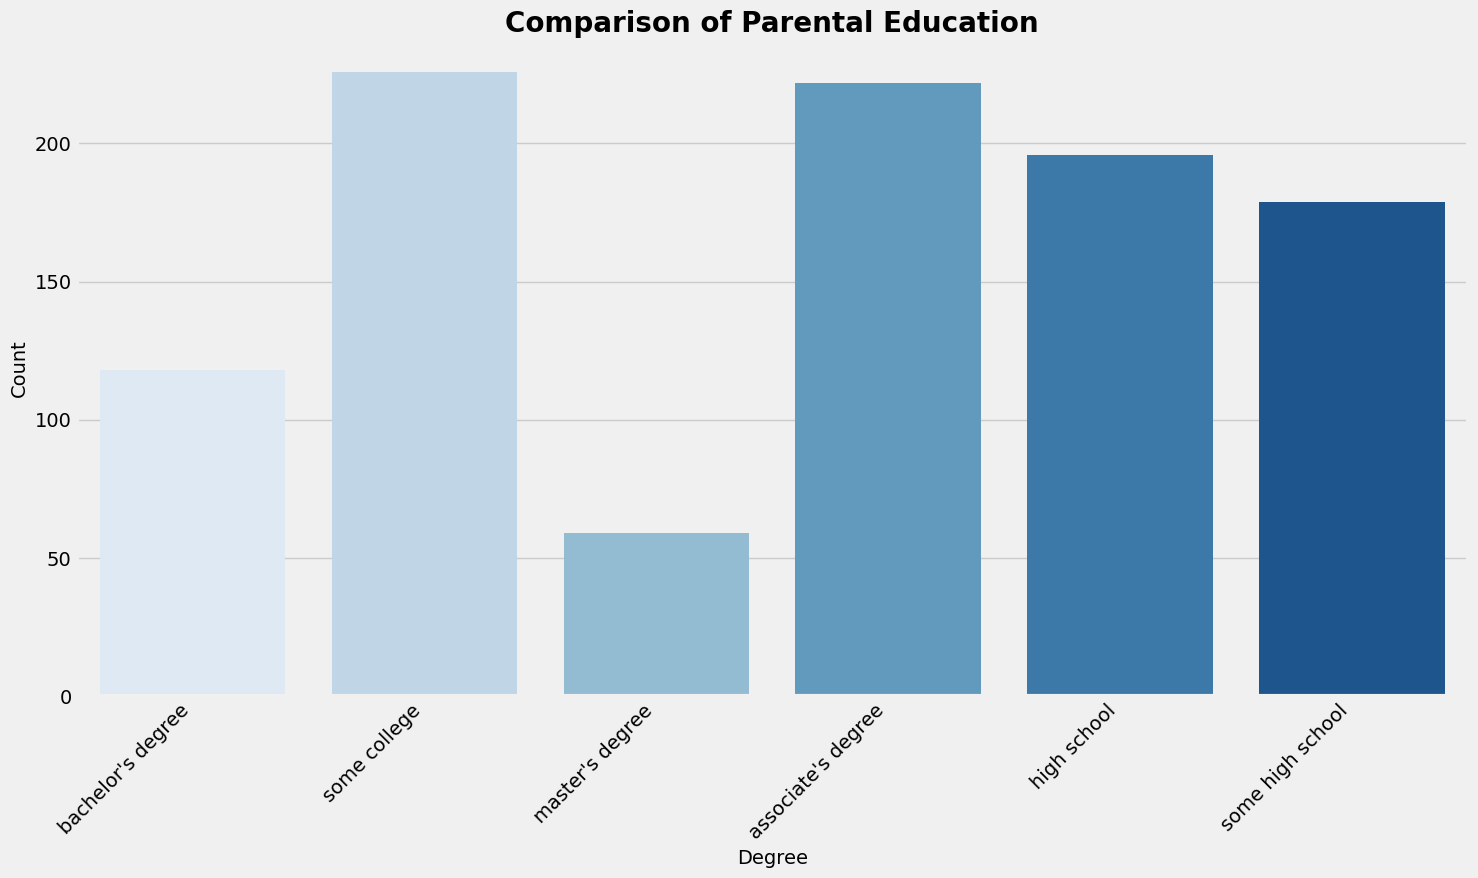

In [27]:


plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(x=df['parental_level_of_education'], palette='Blues')

plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

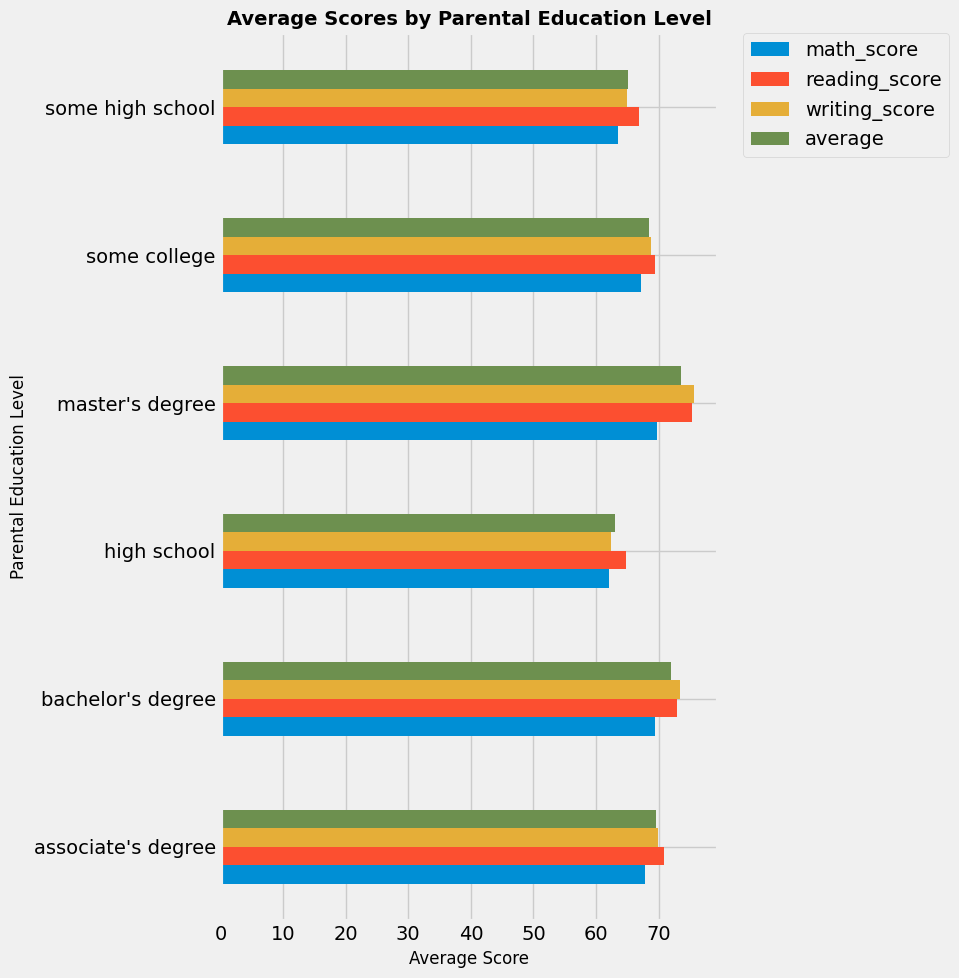

In [28]:
import matplotlib.pyplot as plt

df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score', 'average']].mean().plot(kind='barh', figsize=(10, 10))

plt.title('Average Scores by Parental Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Parental Education Level', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

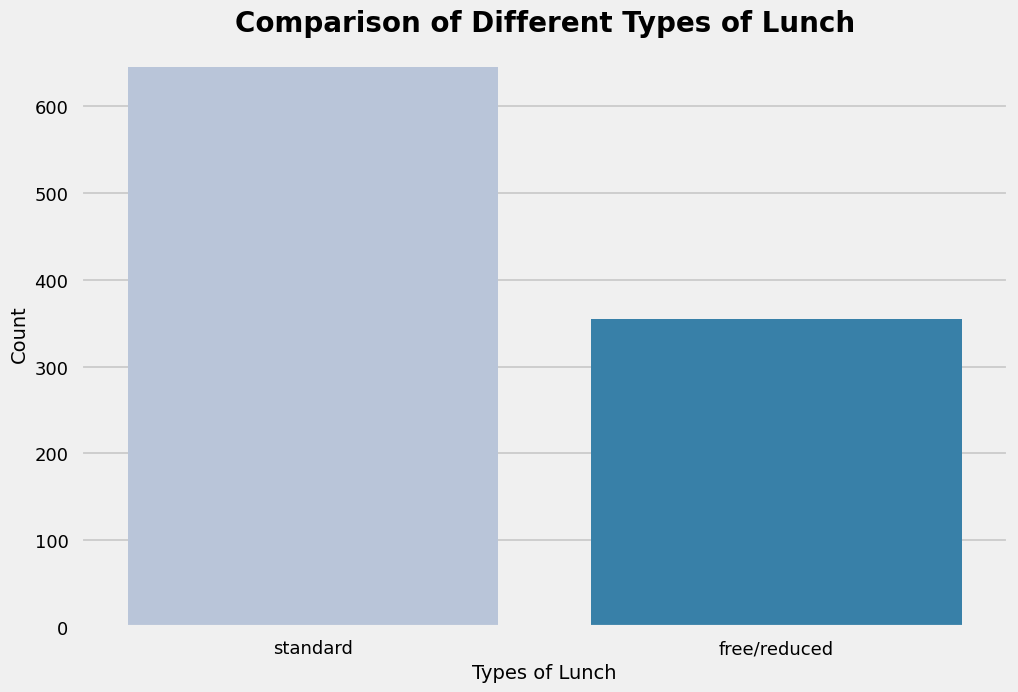

In [29]:


plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')

sns.countplot(x=df['lunch'], palette='PuBu')

plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

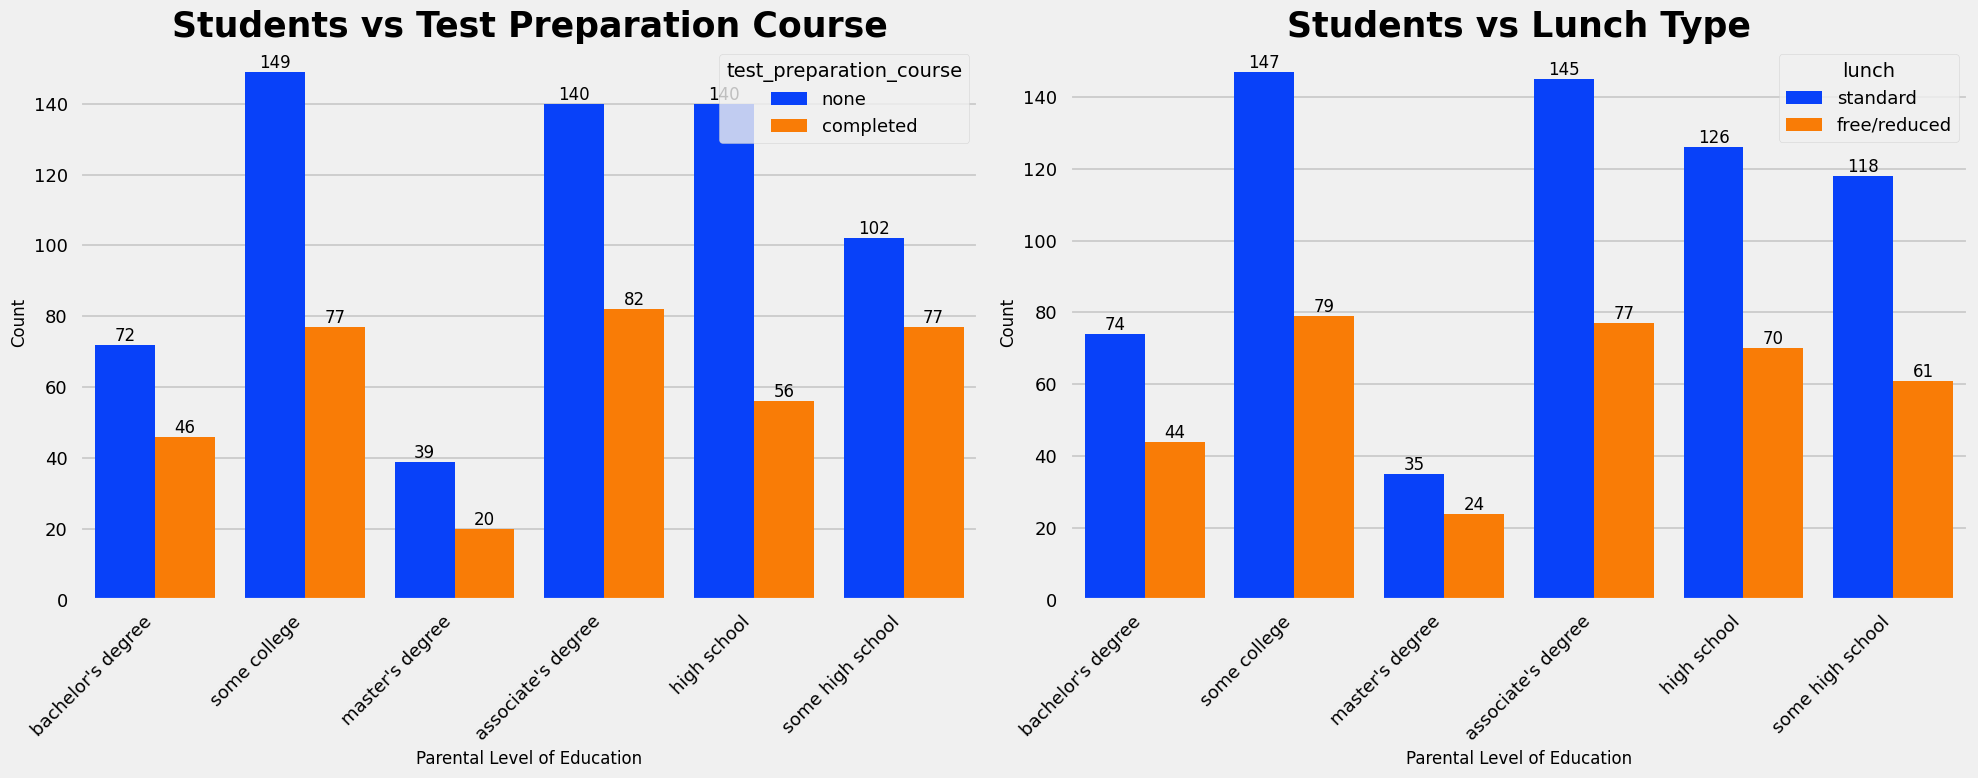

In [30]:

f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Left plot: Parental education vs test preparation course
sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', 
              hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25, fontweight='bold')
ax[0].set_xlabel('Parental Level of Education', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

# Right plot: Parental education vs lunch
sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', 
              hue='lunch', saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs Lunch Type', color='black', size=25, fontweight='bold')
ax[1].set_xlabel('Parental Level of Education', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)

plt.tight_layout()
plt.show()


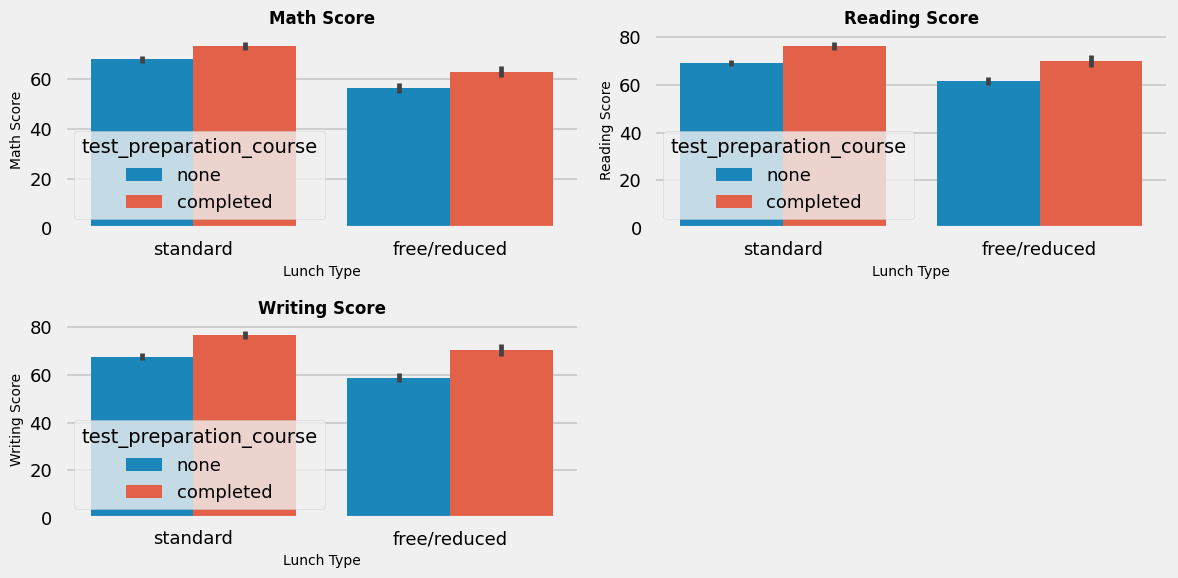

In [31]:

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.title('Math Score', fontweight='bold', fontsize=12)
plt.ylabel('Math Score', fontsize=10)
plt.xlabel('Lunch Type', fontsize=10)

plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.title('Reading Score', fontweight='bold', fontsize=12)
plt.ylabel('Reading Score', fontsize=10)
plt.xlabel('Lunch Type', fontsize=10)

plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.title('Writing Score', fontweight='bold', fontsize=12)
plt.ylabel('Writing Score', fontsize=10)
plt.xlabel('Lunch Type', fontsize=10)

plt.tight_layout()
plt.show()

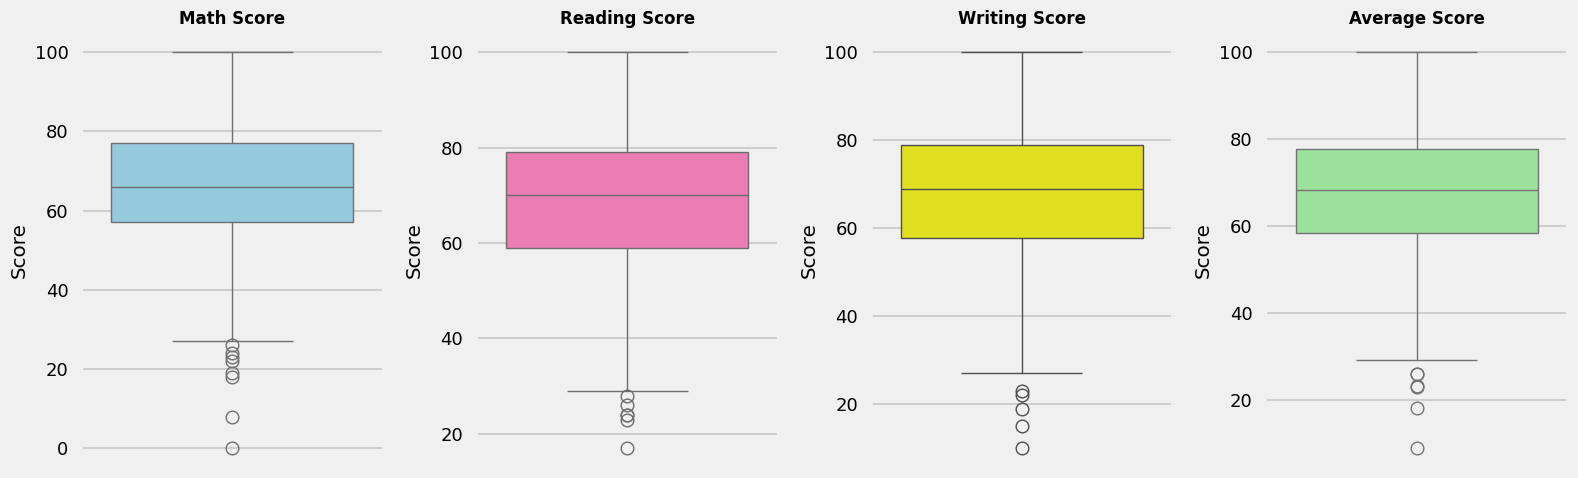

In [32]:
plt.subplots(1, 4, figsize=(16, 5))

plt.subplot(141)
sns.boxplot(y=df['math_score'], color='skyblue')
plt.title('Math Score', fontweight='bold', fontsize=12)
plt.ylabel('Score')

plt.subplot(142)
sns.boxplot(y=df['reading_score'], color='hotpink')
plt.title('Reading Score', fontweight='bold', fontsize=12)
plt.ylabel('Score')

plt.subplot(143)
sns.boxplot(y=df['writing_score'], color='yellow')
plt.title('Writing Score', fontweight='bold', fontsize=12)
plt.ylabel('Score')

plt.subplot(144)
sns.boxplot(y=df['average'], color='lightgreen')
plt.title('Average Score', fontweight='bold', fontsize=12)
plt.ylabel('Score')

plt.tight_layout()
plt.show()

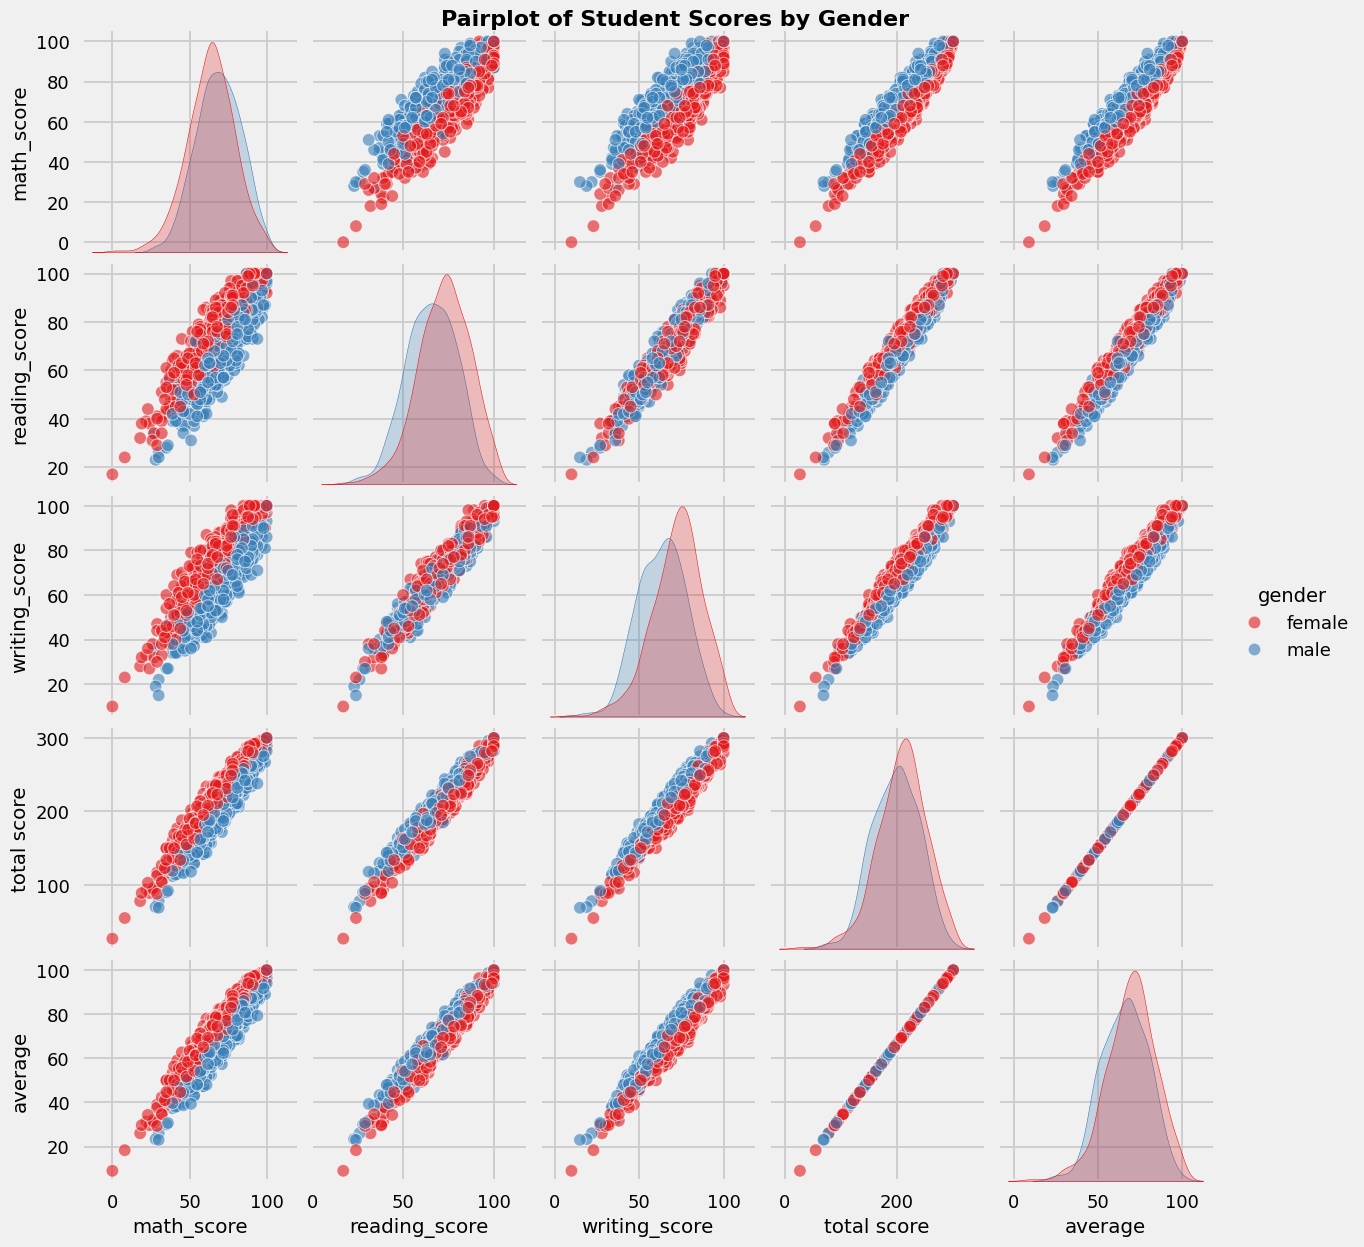

In [33]:
sns.pairplot(df, hue='gender', palette='Set1', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Student Scores by Gender', fontsize=16, fontweight='bold', y=1.00)
plt.show()